This is an explainatory notebook showing how to load grids and display them

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2023-06-21 22:17:57.413426: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-21 22:18:05.023796: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.3/lib64:/scratch/ponel/python/lib:/usr/local/cuda-11.3/tensorRT-8.0/lib64:/usr/local/cuda-11.3/cudnn-8.2/lib64:/usr/local/cuda-11.3/nccl-2.9/lib64
2023-06-21 22:18:05.024107: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: 

In [2]:
from lib.FeatureProvider import load_all_grids, load_grids, load_all_grids_randparams, load_model_weights
from lib.ModelProvider import get_model

In [3]:
# Loading a Model with weights
model_cnn_mnist = get_model(model_type="cnn", dataset="mnist")
model_cnn_mnist = load_model_weights(model_cnn_mnist, model_name="cnn", dataset="mnist")

## Load all grids for one combination of [attack, dataset, model]

In [ ]:
number_images = 300
all_grids = load_all_grids("/project/FoolingDetection/grids", "mnist", "cnn", "correct", max_images=number_images)

In [7]:
n_keys = len(all_grids)
n_grids = min(len(grids) for grids in all_grids.values())


max_rows = 128
n_rows = min(n_grids, max_rows)
image_size = 5

# Visualize grids
fig, axes = plt.subplots(n_rows, n_keys, figsize=(n_keys * image_size, n_rows * image_size))
for i in range(n_rows):
    for j, (key, grids) in enumerate(all_grids.items()):
        ax = axes[i, j]
        ax.imshow(grids[i], cmap='hot', interpolation='nearest')
        ax.axis('off')
        if i == 0:
            ax.set_title(key)
    
plt.show()

## Load all grids for RandParams attacks (Cascading)

In [ ]:
number_images = 300
all_grids_randparams = load_all_grids_randparams("/project/FoolingDetection/grids", "mnist", "cnn", "RandParams/Cascading", max_images=number_images)

vgrads
g_t_i
ig
gradcam_guided
occlusion
gradcam


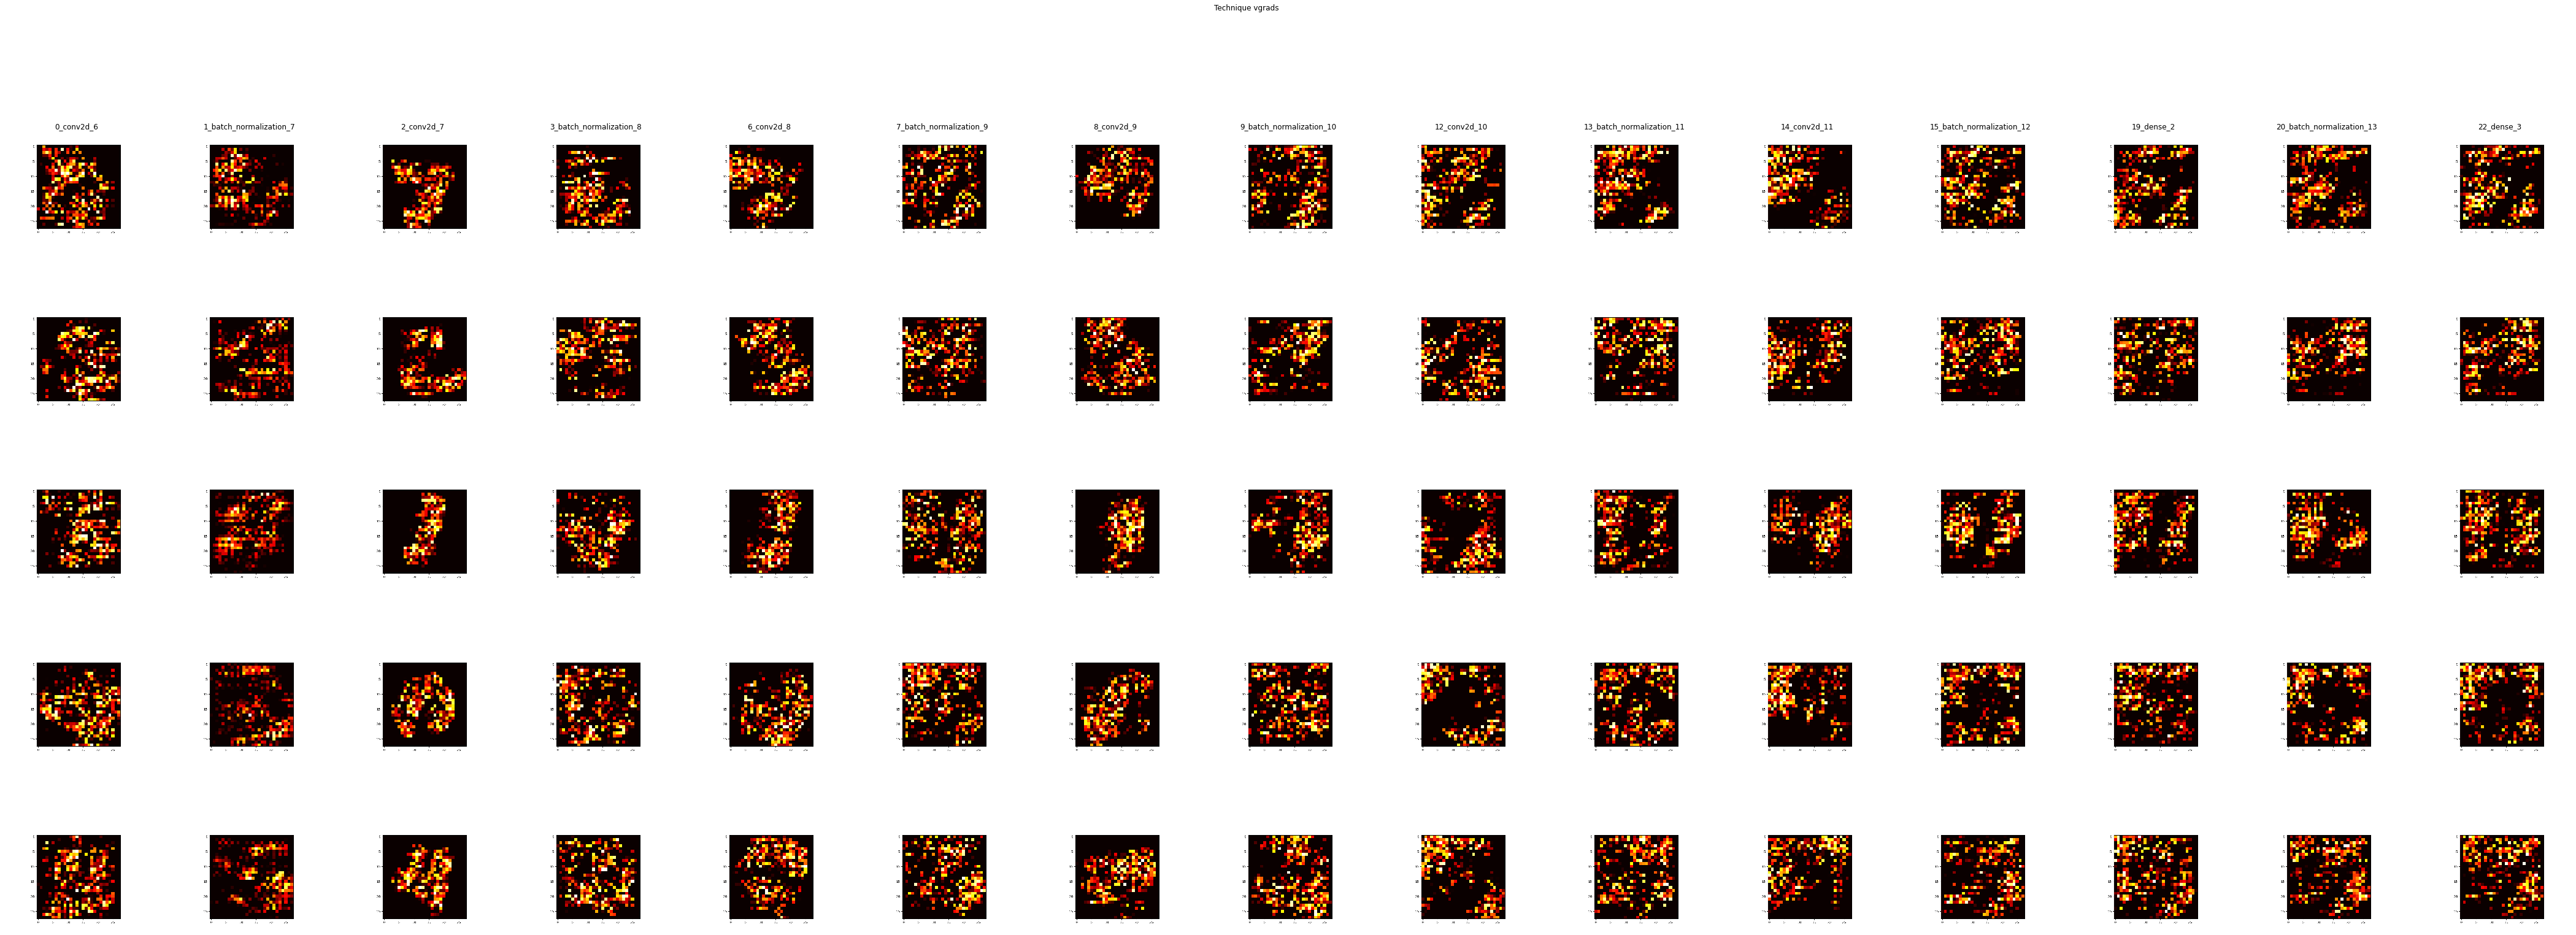

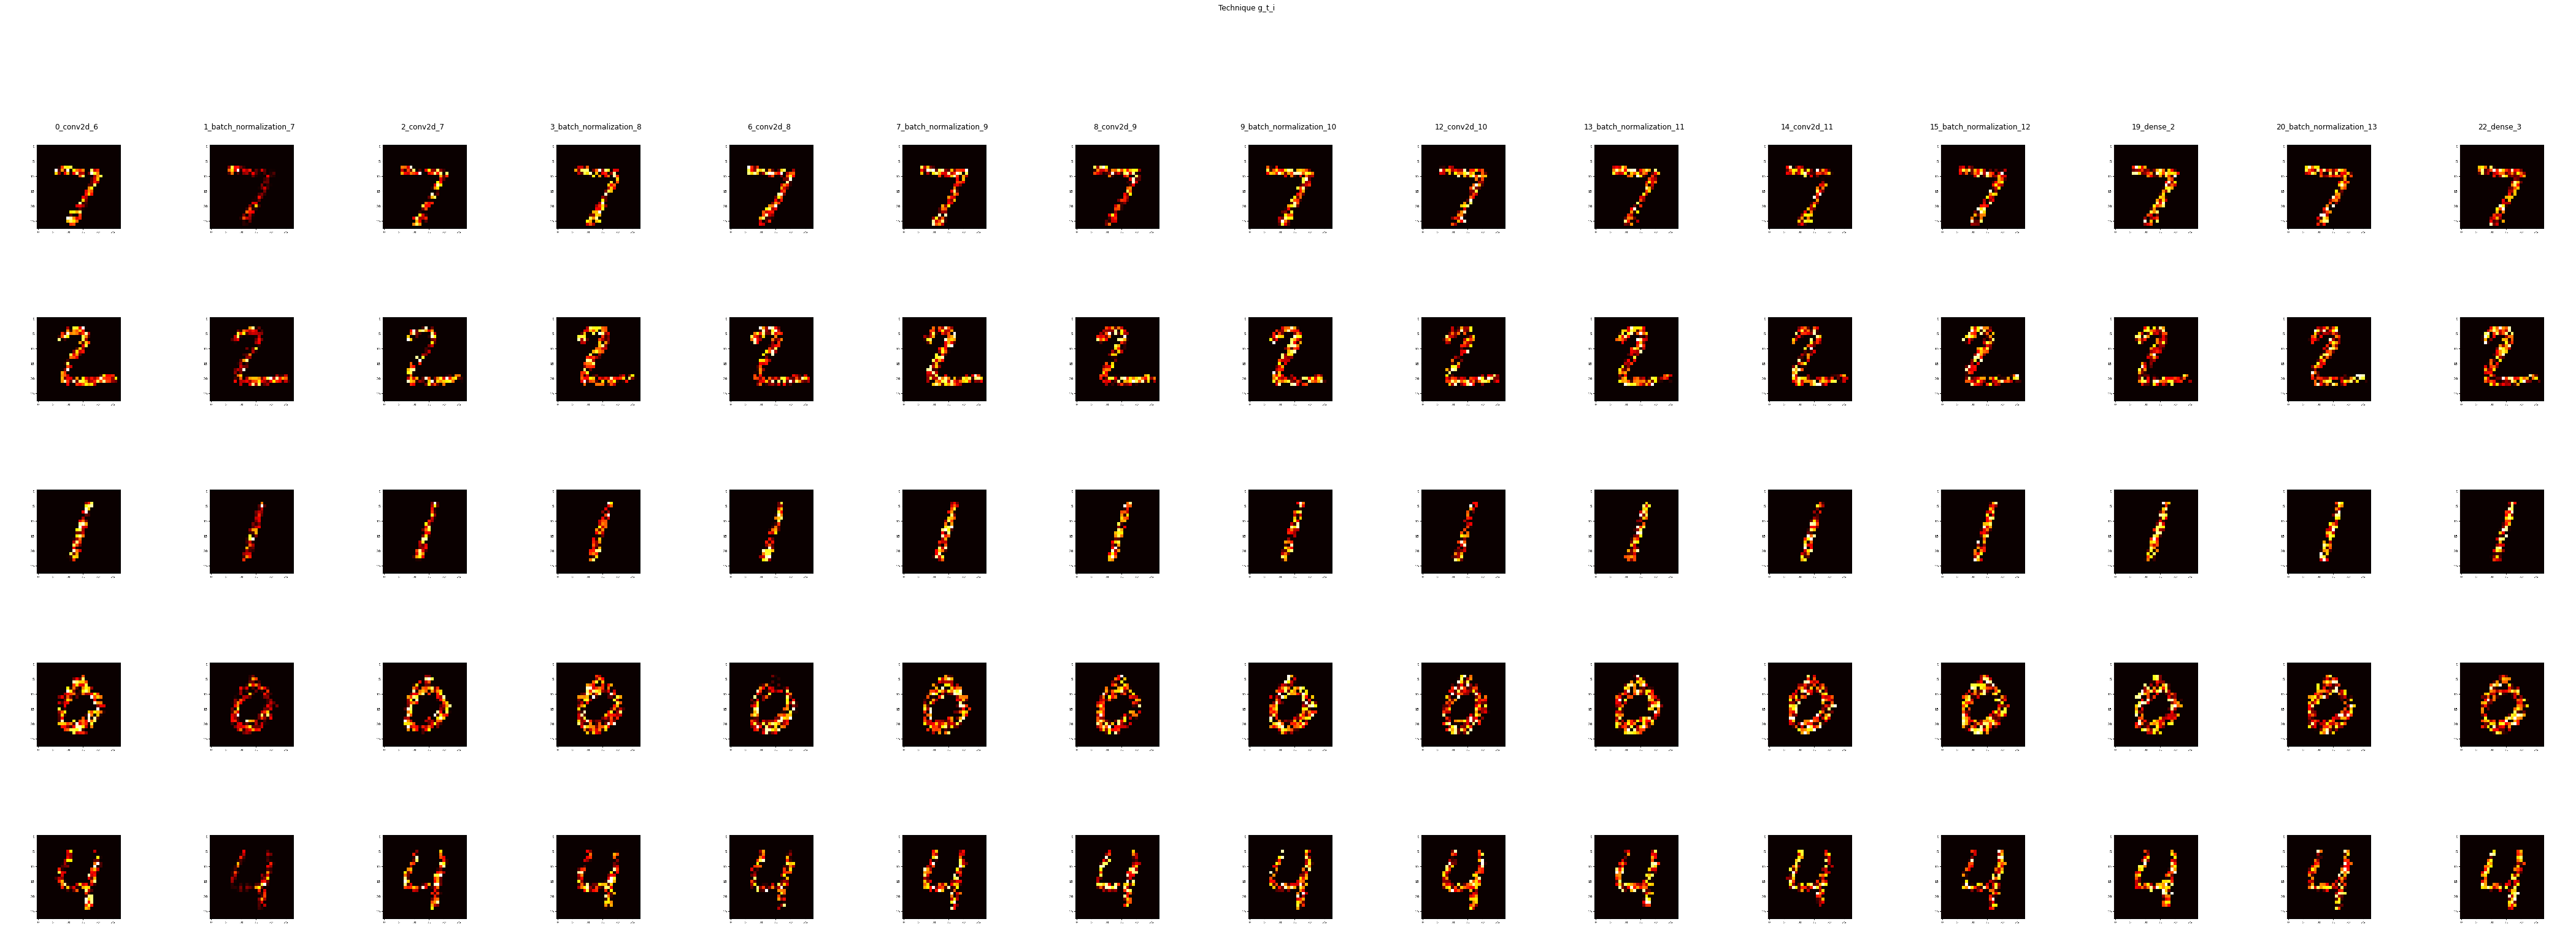

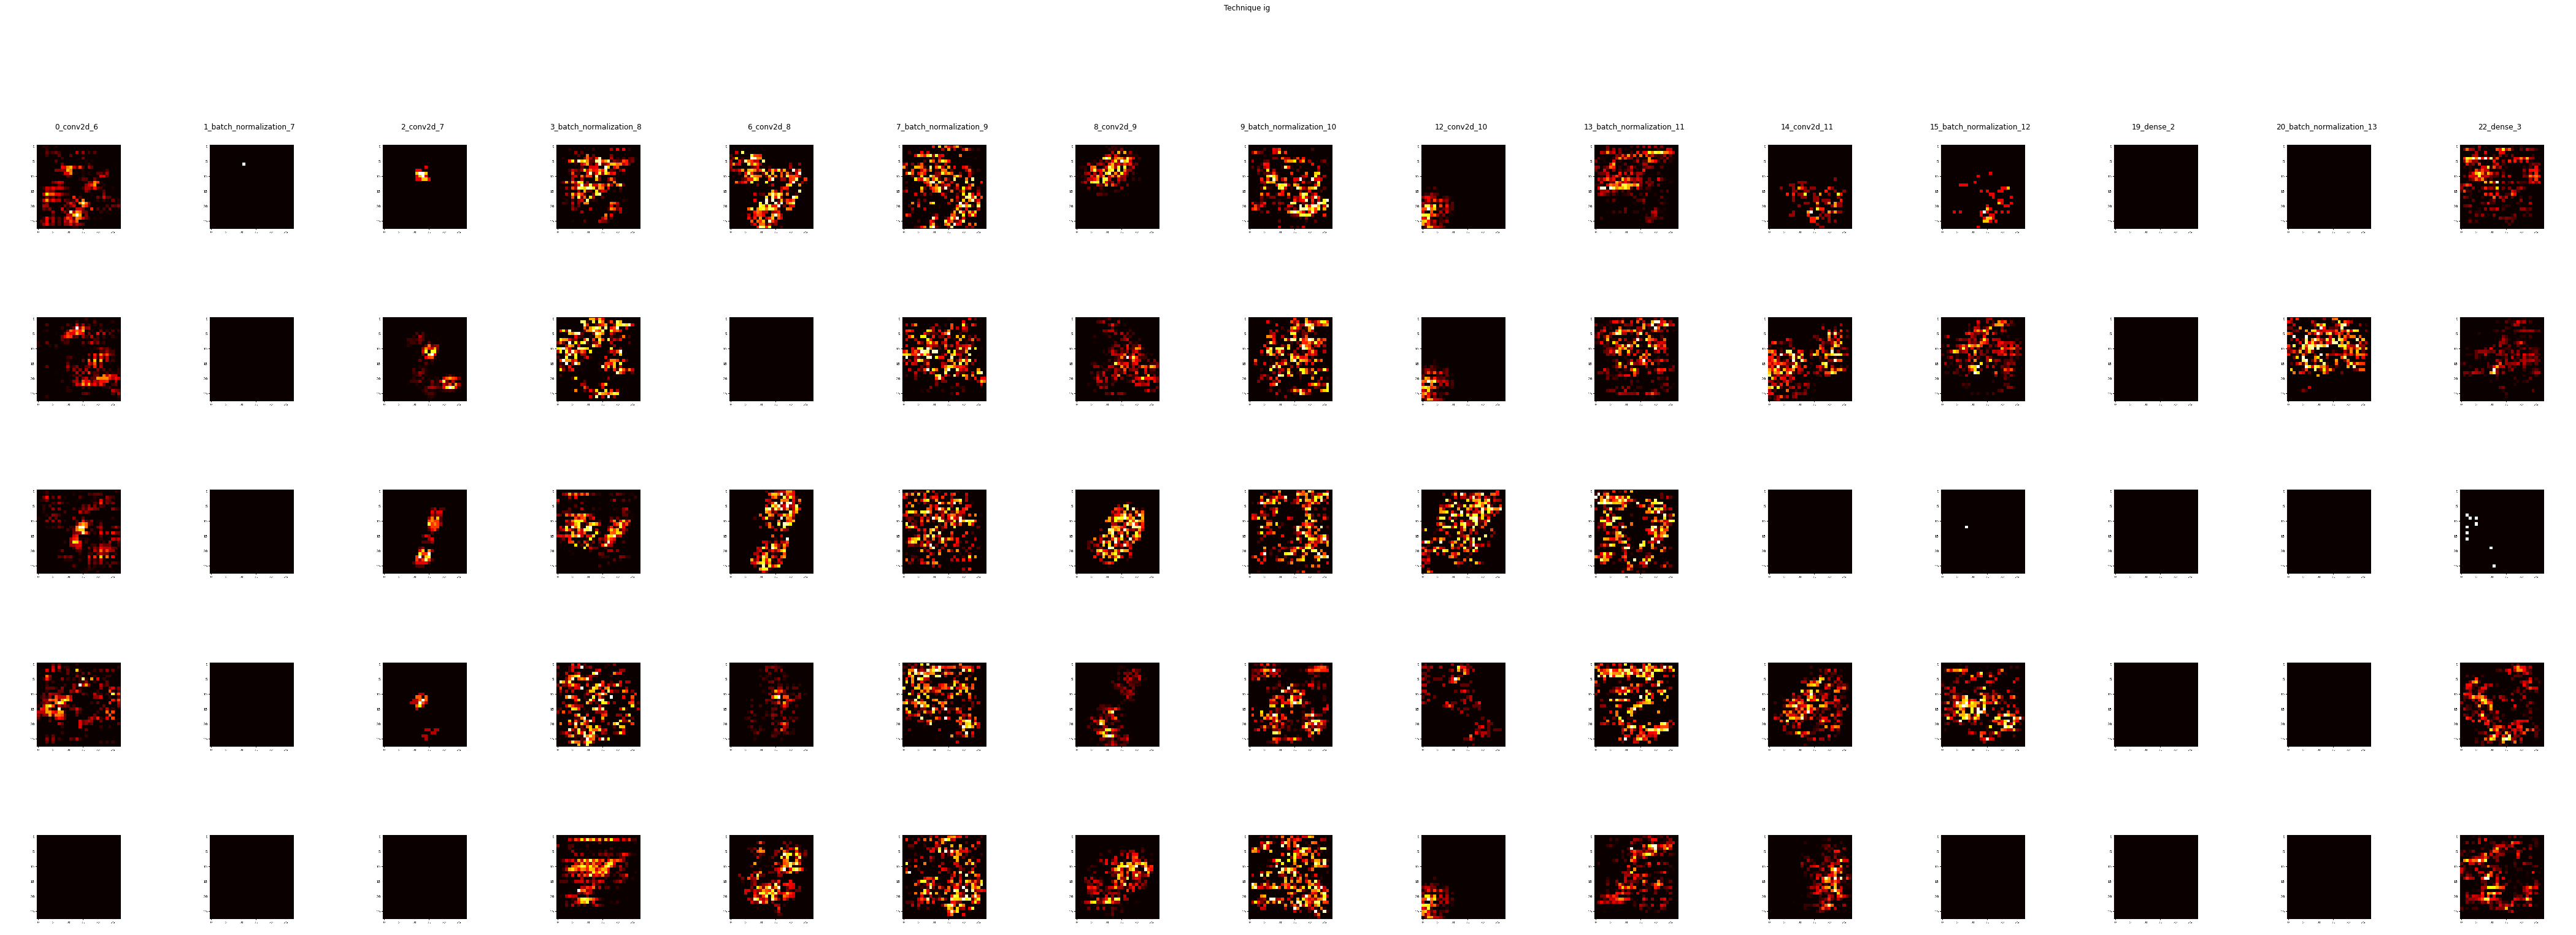

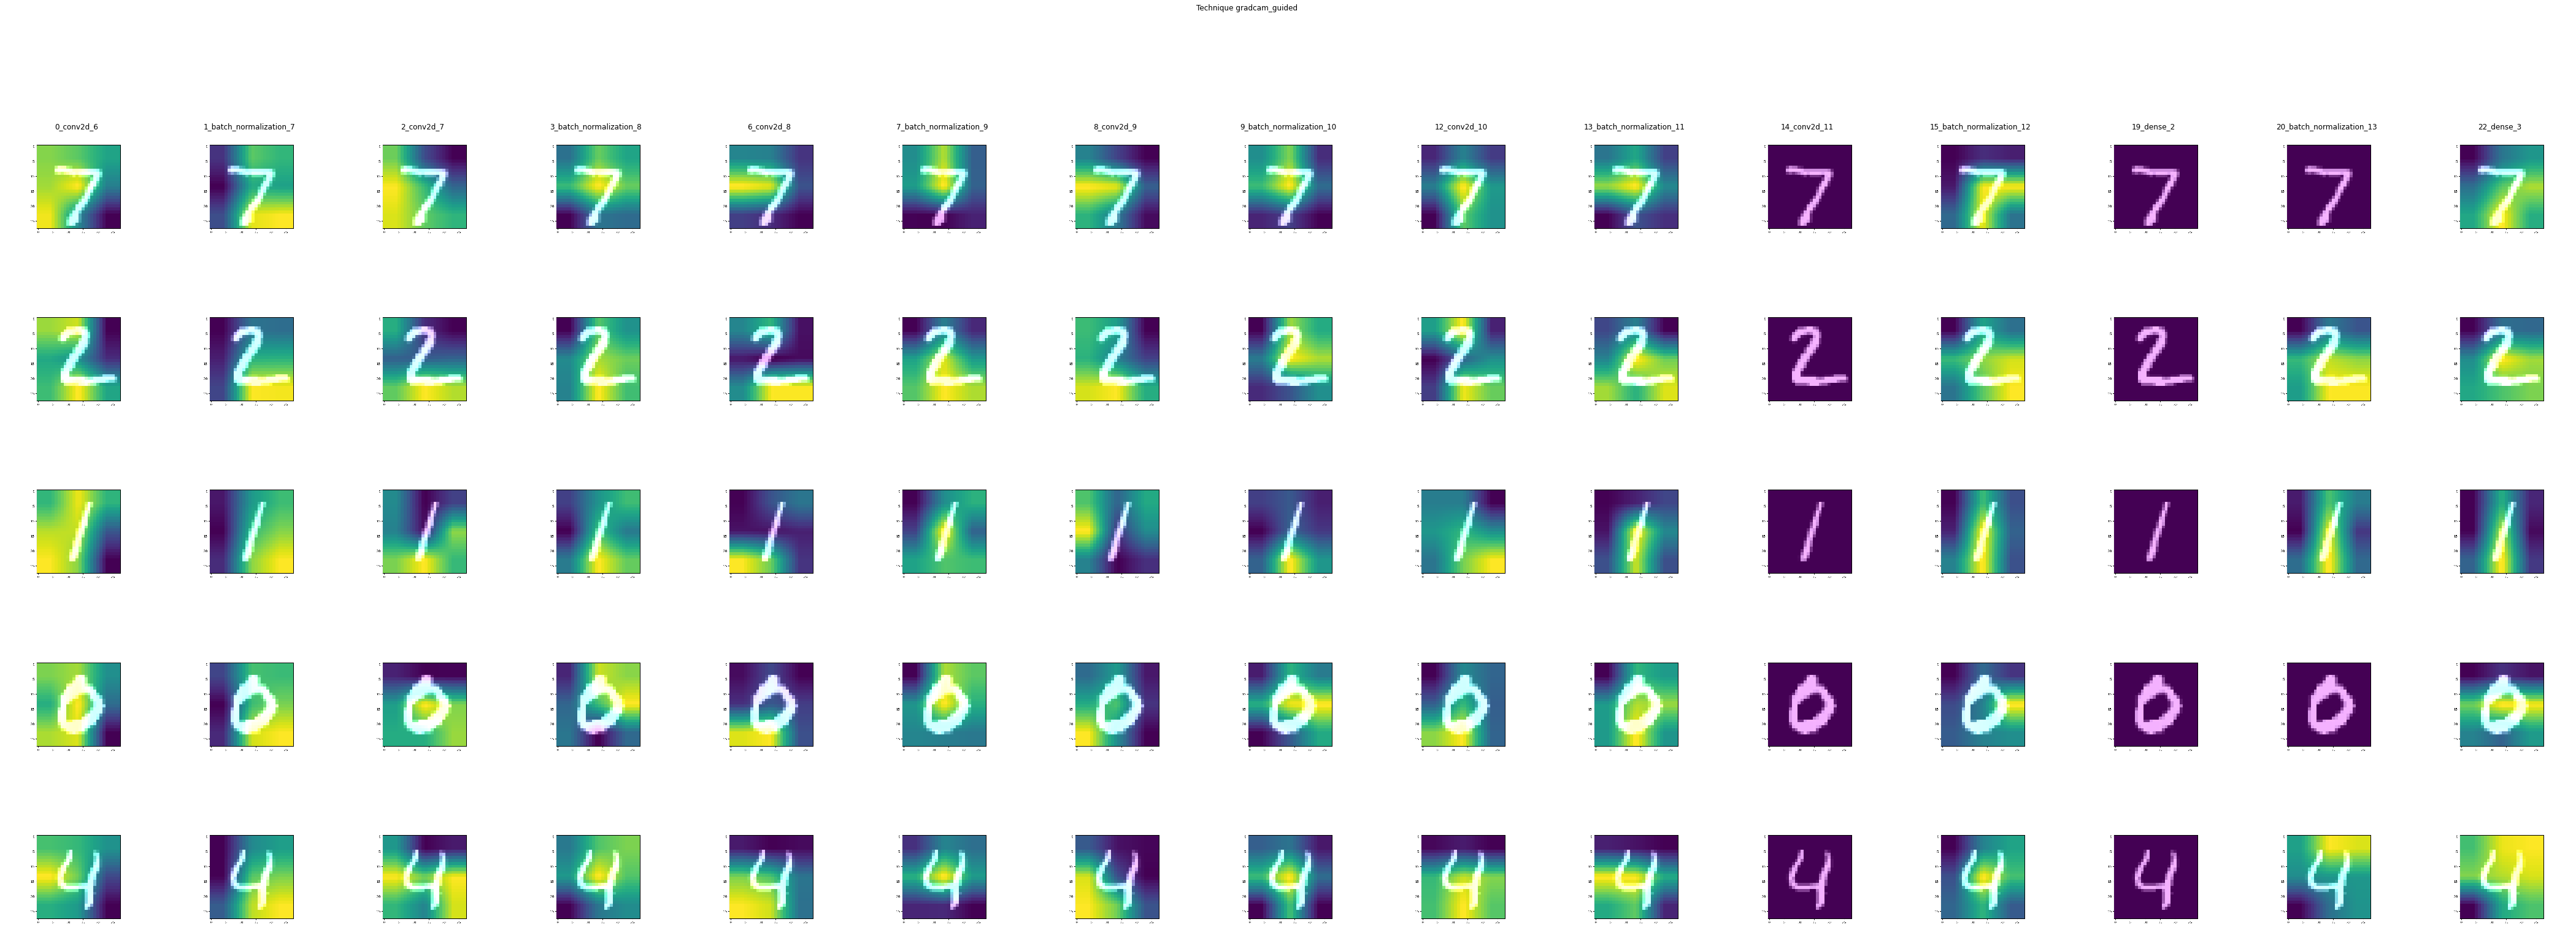

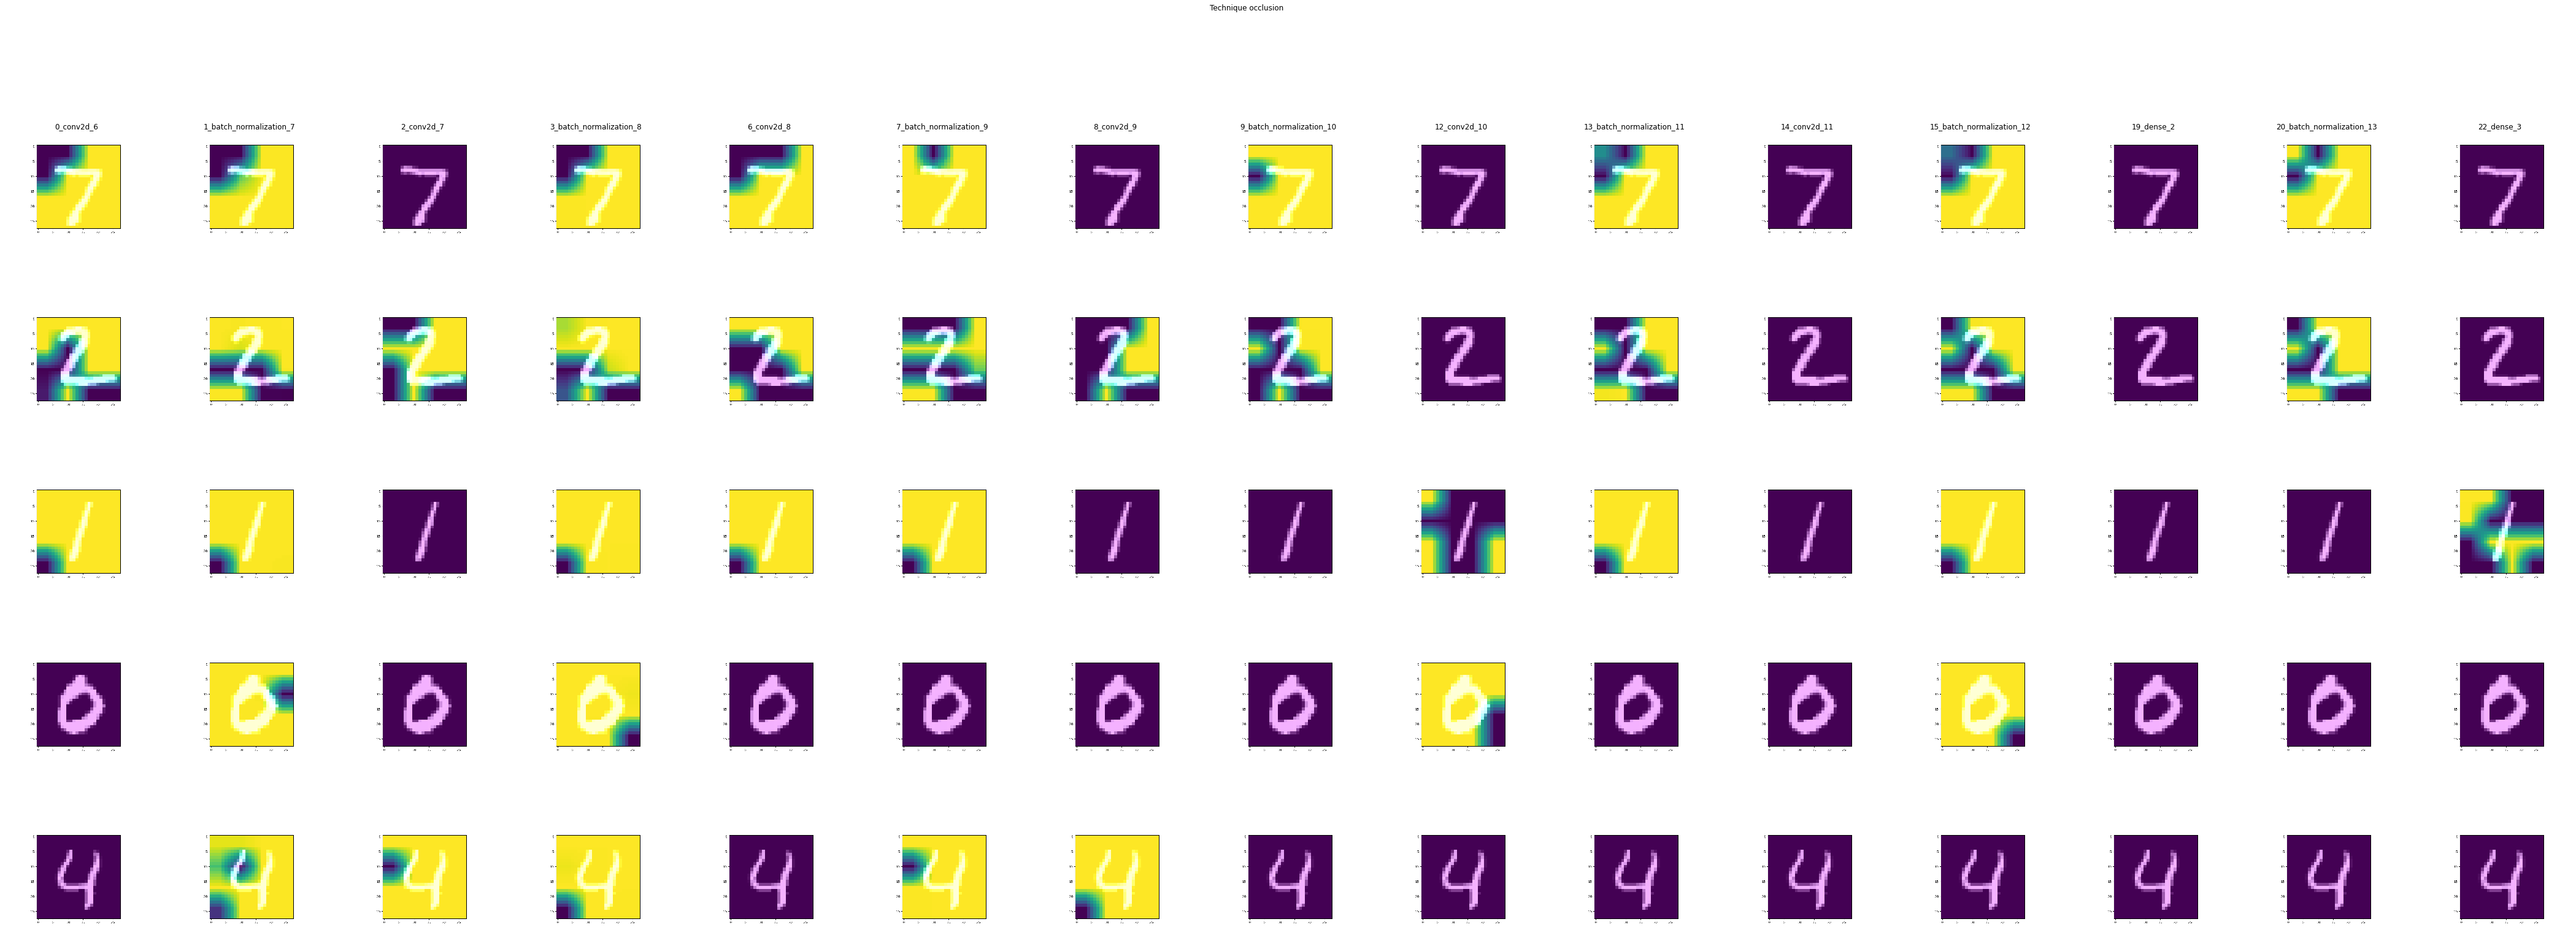

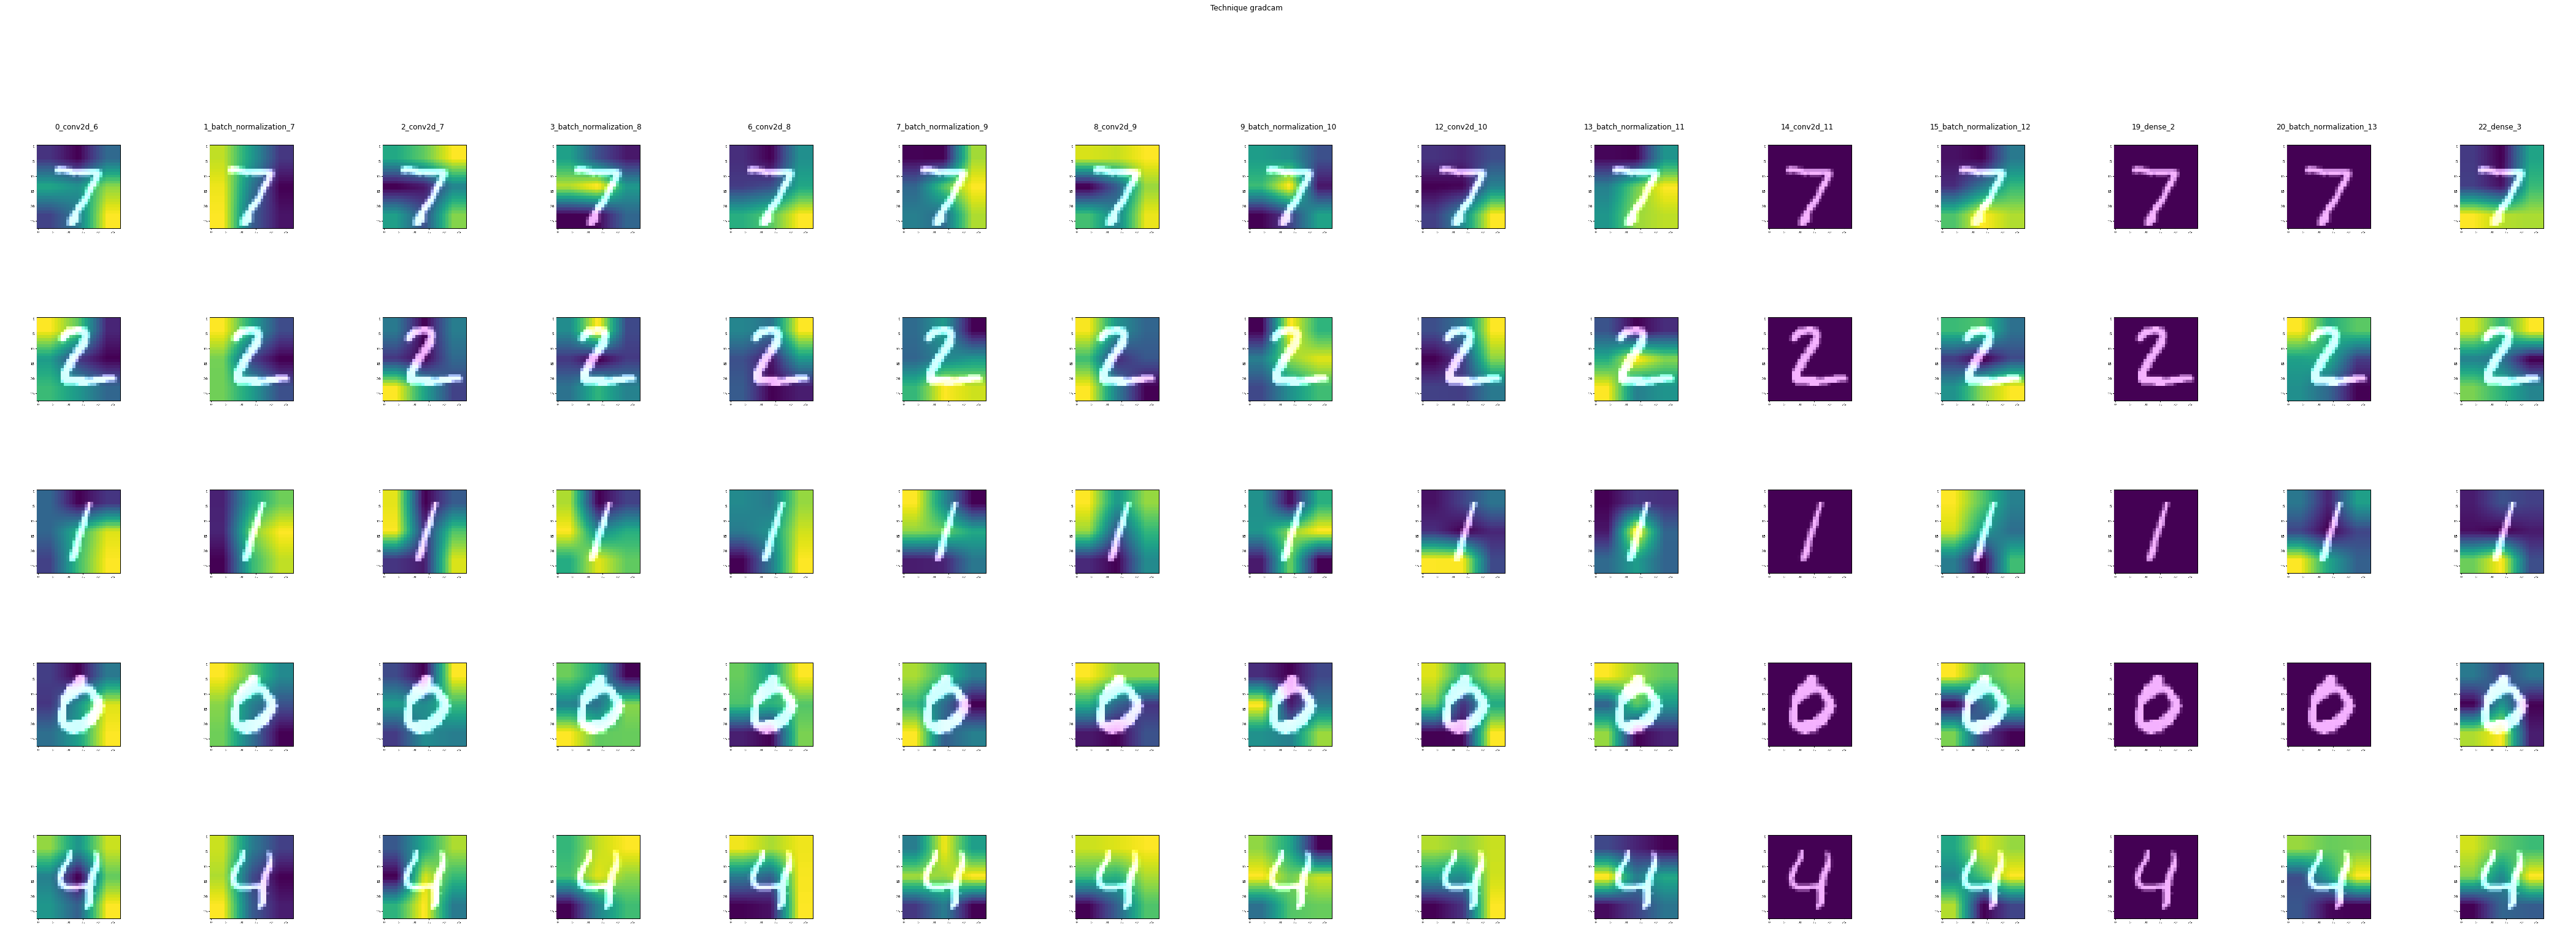

In [7]:

n_techniques = len(next(iter(all_grids_randparams.values())))
n_variants = len(all_grids_randparams)

max_rows = 5
image_size = 5

# Visualize grids for each technique for the RandParams attack
technique_names = list(next(iter(all_grids_randparams.values())).keys())
for technique in range(n_techniques):
    technique_name = technique_names[technique]
    
    n_grids = min(len(variant_grids[technique_name]) for variant_grids in all_grids_randparams.values()) # Number of rows possible
    
    n_rows = min(n_grids, max_rows) # Number of rows to render, based on max_rows
    
    fig, axes = plt.subplots(n_rows, n_variants, figsize=(n_variants * image_size, n_rows * image_size))
    fig.suptitle(f'Technique {technique_name}')
    
    # Visualize grids for current introspection technique
    for i in range(n_rows):
        for j, (variant, variant_grids) in enumerate(all_grids_randparams.items()):
            ax = axes[i, j]
            ax.imshow(variant_grids[technique_name][i], cmap='hot', interpolation='nearest')
            ax.axis('off')
            if i == 0:
                ax.set_title(variant)
plt.show()


In [12]:
## Load all gridsfor RandLabels Attack 
number_images = 128
all_grids_randlabels = load_all_grids("/project/FoolingDetection/grids", "mnist", "cnn", "RandLabels", max_images=number_images)

In [13]:
n_keys = len(all_grids_randlabels)
n_grids = min(len(grids) for grids in all_grids_randlabels.values())


max_rows = 128
n_rows = min(n_grids, max_rows)
image_size = 5

# Visualize grids
fig, axes = plt.subplots(n_rows, n_keys, figsize=(n_keys * image_size, n_rows * image_size))
for i in range(n_rows):
    for j, (key, grids) in enumerate(all_grids_randlabels.items()):
        ax = axes[i, j]
        ax.imshow(grids[i], cmap='hot', interpolation='nearest')
        ax.axis('off')
        if i == 0:
            ax.set_title(key)
    
plt.show()